##### Contents

* inputs and outputs
* scaling the outputs using population in millions ( 2011 senses )
* visualisation
* pyDEA
* results : efficiency, optimality status, scale inefficiency
* methods : Constant returns to scale, variable returns to scale
* inference and discussion

#### Downloading Necessary Libraries

In [390]:
import pandas as pd
import matplotlib.pyplot as plt

#### Inputs and Outputs

###### Inputs

* Electricity - Generation in MWh (scaled to population)
* Roads - Kms (scaled to population)
* Birth rate - the number of live births per thousand of population per year.
* Schools - number of schools ( scaled to population )
* Infrastructure - Crores invested (scaled to population )

###### Outputs

* Tendulkar - Percentage of people below poverty ,Index 
* Lakdawala - Percentage of people below poverty, Index 
* Infant mortality rate  - number of deaths per 1,000 live births of children under one year of age.
* GDP - gross domestic product of state in crores ( scaled to population )
* Tax revenue - Crores  (scaled to population )

##### Scale data - area and population can be used for scaling the data . we prefer in population rather than area

In [391]:
states_area_pop = pd.read_csv("state_area_population.csv",header=None)
states_area_pop.columns =['states','area','population']
states_area_pop.index=states_area_pop.states
states_area_pop = states_area_pop.drop('states',axis=1)
states_area_pop.population  = states_area_pop.population/1000000

In [392]:
states_area_pop.population

states
 Andhra Pradesh             84.580777
 Arunachal Pradesh           1.383727
 Assam                      31.205576
 Bihar                     104.099452
 Chhattisgarh               25.545198
 Goa                         1.458545
 Gujarat                    60.439692
 Haryana                    25.351462
 Himachal Pradesh            6.864602
 Jammu & Kashmir (1) ++     12.541302
 Jharkhand                  32.988134
 Karnataka                  61.095297
 Kerala                     33.406061
 Madhya Pradesh             72.626809
 Maharashtra               112.374333
 Manipur                     2.855794
 Meghalaya                   2.966889
 Mizoram                     1.097206
 Nagaland                    1.978502
 Odisha                     41.974218
 Punjab                     27.743338
 Rajasthan                  68.548437
 Sikkim                      0.610577
 Tamil Nadu                 72.147030
 Tripura                     3.673917
 Uttar Pradesh             199.812341
 Utta

* States population in Million
* States area in sq.kms

In [393]:
inputs = pd.read_csv("inputs.csv",delimiter="\t")

In [394]:
inputs = inputs.iloc[:,:6]

In [395]:
inputs.columns =['State','Electricity','Roads','Birth_rate','Schools','Infrastructure']

In [396]:
inputs.index = inputs.State

In [397]:
inputs = inputs.drop('State',axis=1)

In [398]:
inputs.head()

,Electricity,Roads,Birth_rate,Schools,Infrastructure
State,,,,,
Andhra Pradesh,39130,4537,17.9,103830,275941.00
Arunachal Pradesh,1570,1992,20.5,4440,317310.36
Assam,10240,2836,23.2,53859,51585.81
Bihar,19370,3642,28.1,68331,203528.79
Chhattisgarh,11820,2184,25.3,51339,198011.83


In [399]:
inputs_scaled = pd.DataFrame()

In [400]:
inputs_scaled['Electricity']=inputs.Electricity.divide(states_area_pop.population.values,axis=0)
inputs_scaled['Roads']=inputs.Roads.divide(states_area_pop.population.values,axis=0)
inputs_scaled['Schools']=inputs.Schools.divide(states_area_pop.population.values,axis=0)
inputs_scaled['Infrastructure']=inputs.Infrastructure.divide(states_area_pop.population.values,axis=0)
inputs_scaled['Birth_rate'] = inputs.Birth_rate/1000

In [401]:
inputs_scaled.head()

,Electricity,Roads,Schools,Infrastructure,Birth_rate
State,,,,,
Andhra Pradesh,462.634672,53.641030,1227.583899,3262.455250,0.0179
Arunachal Pradesh,1134.616872,1439.590324,3208.725421,229315.724850,0.0205
Assam,328.146483,90.881194,1725.941543,1653.095908,0.0232
Bihar,186.072065,34.985775,656.401150,1955.137958,0.0281
Chhattisgarh,462.709273,85.495521,2009.731927,7751.430621,0.0253


In [402]:
outputs = pd.read_csv("outputs.csv")

In [403]:
outputs.index = outputs.States
outputs = outputs.drop('States',axis=1)
outputs.head()

,Tendulkar,Lakdawala,IMR,GDP,Tax_revenues
States,,,,,
Andhra Pradesh,9.2,15.8,46,319864,45140
Arunachal Pradesh,34.7,17.6,25,9021,210
Assam,32.0,19.7,58,112688,5930
Bihar,33.7,41.4,48,203555,9870
Chhattisgarh,39.9,40.9,51,119420,9010


In [404]:
outputs_scaled.GDP = outputs.GDP.divide(states_area_pop.population.values,axis=0)
outputs_scaled.Tax_revenues = outputs_scaled.GDP.divide(states_area_pop.population.values,axis=0)
outputs_scaled.Tendulkar = outputs.Tendulkar
outputs_scaled.Lakdawala = outputs.Lakdawala
outputs_scaled.IMR = outputs.IMR

In [405]:
outputs_scaled.head()

,Tendulkar,Lakdawala,IMR,GDP,Tax_revenues
States,,,,,
Andhra Pradesh,9.2,15.8,46,3781.757645,44.711787
Arunachal Pradesh,34.7,17.6,25,6519.349554,4711.442036
Assam,32.0,19.7,58,3611.149495,115.721290
Bihar,33.7,41.4,48,1955.389736,18.783862
Chhattisgarh,39.9,40.9,51,4674.851219,183.003131


In [406]:
print(inputs_scaled.shape)
print(outputs_scaled.shape)

(28, 5)
(28, 5)


#### PCA for visualisation

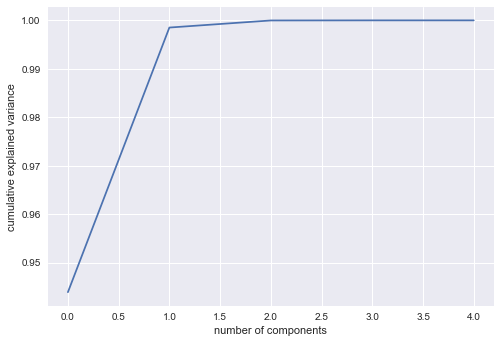

In [407]:
pca = PCA().fit(inputs)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()

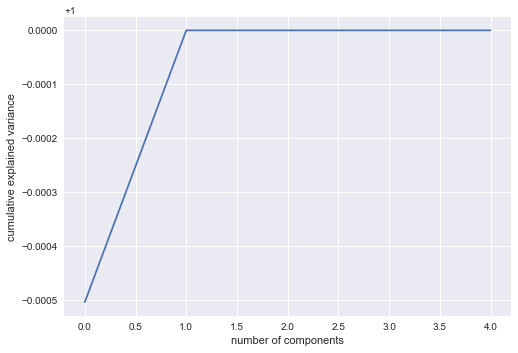

In [408]:
pca = PCA().fit(outputs)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()

##### for the both the inputs and outputs most of the variance is explained by the 1st component itself

#### Visualisation using 1st PCA all states

In [409]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
import numpy as np

In [410]:
inputs_pca = pca.fit_transform(inputs.values)
output_pca = pca.fit_transform(outputs.values)

In [411]:
inputs_pca = pd.DataFrame(inputs_pca)
output_pca = pd.DataFrame(output_pca)

In [412]:
inputs_pca.index = inputs.index

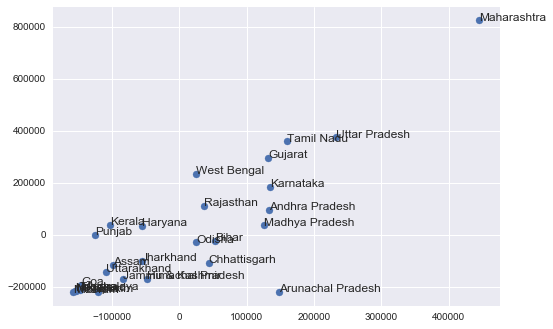

In [413]:
fig, ax = plt.subplots()
ax.scatter(inputs_pca.iloc[:,0], output_pca.iloc[:,0])
for i, txt in enumerate(inputs_pca.index):
    ax.annotate(txt, (inputs_pca.iloc[:,0][i], output_pca.iloc[:,0][i]))
plt.show()

##### Maharashtra seems to have high input and high output combinations

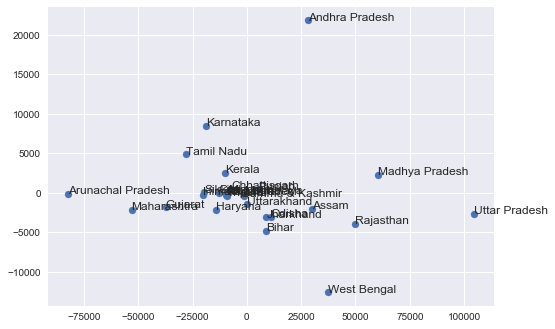

In [414]:
fig, ax = plt.subplots()
ax.scatter(inputs_pca.iloc[:,1], output_pca.iloc[:,1])
for i, txt in enumerate(inputs_pca.index):
    ax.annotate(txt, (inputs_pca.iloc[:,1][i], output_pca.iloc[:,1][i]))
plt.show()

##### 2nd PCA is not explaining much

##### pyDEA - Constant Returns to scale

In [415]:
import pydea

In [416]:
results = pydea.DEAProblem(inputs_scaled, outputs_scaled,returns='CRS').solve()

In [417]:
import matplotlib.pyplot as plt

In [418]:
import seaborn as sns

In [419]:
inputs.index = outputs.index

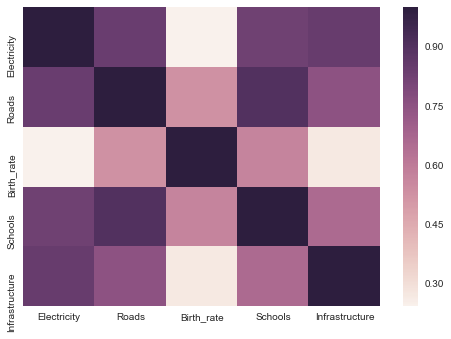

In [420]:
sns.heatmap(inputs.corr())
plt.show()

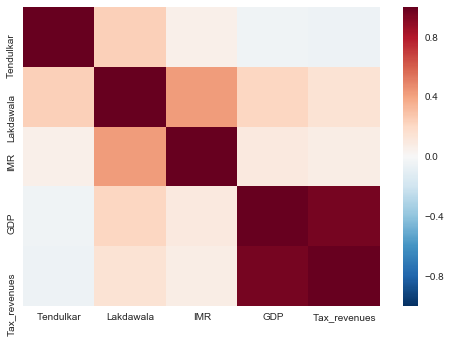

In [421]:
sns.heatmap(outputs.corr())
plt.show()

##### Solution Discussion

##### 5 States are inefficient

In [422]:
efficiency_df = pd.DataFrame(results['Efficiency'])
efficiency_df

,Efficiency
State,
Andhra Pradesh,0.994605
Arunachal Pradesh,0.981444
Assam,1.000000
Bihar,1.000000
Chhattisgarh,1.000000
Goa,1.000000
Gujarat,1.000000
Haryana,1.000000
Himachal Pradesh,0.933556


##### In-Efficient states

In [423]:
efficiency_df[efficiency_df.round(2).Efficiency!=1.00]

,Efficiency
State,
Andhra Pradesh,0.994605
Arunachal Pradesh,0.981444
Himachal Pradesh,0.933556
Jammu & Kashmir,0.821369
Jharkhand,0.945535
Madhya Pradesh,0.936853
Manipur,0.795605
Meghalaya,0.973251
Nagaland,0.945570


##### All the solutions are optimal

In [424]:
results['Status']

State
Andhra Pradesh       Optimal
Arunachal Pradesh    Optimal
Assam                Optimal
Bihar                Optimal
Chhattisgarh         Optimal
Goa                  Optimal
Gujarat              Optimal
Haryana              Optimal
Himachal Pradesh     Optimal
Jammu & Kashmir      Optimal
Jharkhand            Optimal
Karnataka            Optimal
Kerala               Optimal
Madhya Pradesh       Optimal
Maharashtra          Optimal
Manipur              Optimal
Meghalaya            Optimal
Mizoram              Optimal
Nagaland             Optimal
Odisha               Optimal
Punjab               Optimal
Rajasthan            Optimal
Sikkim               Optimal
Tamil Nadu           Optimal
Tripura              Optimal
Uttar Pradesh        Optimal
Uttarakhand          Optimal
West Bengal          Optimal
Name: Status, dtype: object

##### Slack variables for the state corresponding to the peers

In [425]:
results['Weights']

,in_Birth_rate,in_Electricity,in_Infrastructure,in_Roads,in_Schools,out_GDP,out_IMR,out_Lakdawala,out_Tax_revenues,out_Tendulkar
0,37.353925,0.000000,0.000000e+00,0.006177,0.000000,0.000026,0.019480,0.000000,0.000000,0.000000
1,48.780488,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.001484,0.000024,0.024238
2,24.914956,0.001286,0.000000e+00,0.000000,0.000000,0.000000,0.008695,0.000000,0.000000,0.015491
3,30.408757,0.000782,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.007179,0.000000,0.020854
4,27.329268,0.000667,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.006918,0.000000,0.017971
5,0.000000,0.000692,8.529261e-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000063,0.000000
6,0.000000,0.001255,0.000000e+00,0.000000,0.000603,0.000081,0.006239,0.001412,0.000000,0.000000
7,0.000000,0.001072,0.000000e+00,0.000000,0.000531,0.000073,0.005270,0.000000,0.000000,0.000000
8,59.171598,0.000000,0.000000e+00,0.000000,0.000000,0.000026,0.017869,0.000000,0.000000,0.000000
9,54.644809,0.000000,0.000000e+00,0.000000,0.000000,0.000024,0.016502,0.000000,0.000000,0.000000


In [426]:
results_vrs = pydea.DEAProblem(inputs_scaled, outputs_scaled,returns='VRS').solve()

In [427]:
efficiency_vrs_df = pd.DataFrame(results_vrs['Efficiency'])

##### Only 2 states are not efficient based on the Variables returns to scale

In [428]:
efficiency_vrs_df[efficiency_vrs_df.round(2).Efficiency!=1.00]

,Efficiency
State,
Jammu & Kashmir,0.951749
Jharkhand,0.983967
Rajasthan,0.929051


In [429]:
results_vrs['Status']

State
Andhra Pradesh       Optimal
Arunachal Pradesh    Optimal
Assam                Optimal
Bihar                Optimal
Chhattisgarh         Optimal
Goa                  Optimal
Gujarat              Optimal
Haryana              Optimal
Himachal Pradesh     Optimal
Jammu & Kashmir      Optimal
Jharkhand            Optimal
Karnataka            Optimal
Kerala               Optimal
Madhya Pradesh       Optimal
Maharashtra          Optimal
Manipur              Optimal
Meghalaya            Optimal
Mizoram              Optimal
Nagaland             Optimal
Odisha               Optimal
Punjab               Optimal
Rajasthan            Optimal
Sikkim               Optimal
Tamil Nadu           Optimal
Tripura              Optimal
Uttar Pradesh        Optimal
Uttarakhand          Optimal
West Bengal          Optimal
Name: Status, dtype: object

##### Slacks based on the variables returns to scale

In [430]:
results_vrs['Weights']

,in_Birth_rate,in_Electricity,in_Infrastructure,in_Roads,in_Schools,out_GDP,out_IMR,out_Lakdawala,out_Tax_revenues,out_Tendulkar
0,30.764001,0.000324,0.000000e+00,0.002438,0.000137,0.000000,0.011575,0.000000,0.000000,0.000000
1,48.780488,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000434,0.000029,0.028385
2,24.782162,0.000119,0.000000e+00,0.000000,0.000224,0.000000,0.015452,0.000000,0.000000,0.011668
3,24.680153,0.001196,0.000000e+00,0.000000,0.000128,0.000000,0.000000,0.003706,0.000000,0.000000
4,28.859425,0.000583,0.000000e+00,0.000000,0.000000,0.000000,0.002542,0.006538,0.000000,0.012286
5,0.000000,0.000692,8.529261e-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000063,0.000000
6,0.000000,0.001205,0.000000e+00,0.000000,0.000638,0.000058,0.007097,0.000000,0.000000,0.000000
7,0.000000,0.000929,0.000000e+00,0.000000,0.000628,0.000053,0.007396,0.000000,0.000000,0.001700
8,55.992576,0.000061,0.000000e+00,0.000000,0.000000,0.000006,0.008481,0.000000,0.000000,0.000000
9,54.574491,0.000000,2.197095e-07,0.000000,0.000000,0.000000,0.008617,0.000000,0.000000,0.000000


#### Scale Efficiency

In [431]:
scale_Efficiency=pd.DataFrame(efficiency_df.iloc[:,:].values/efficiency_vrs_df.iloc[:,:].values)
scale_Efficiency.index = inputs.index
scale_Efficiency.shape

(28, 1)

In [432]:
efficiency_vrs_df = pd.DataFrame(efficiency_vrs_df)
efficiency_vrs_df.index = inputs.index

In [441]:
efficiency_df.index = inputs.index
efficiency_vrs_df.index = inputs.index
scale_Efficiency.index = inputs.index

In [442]:
merged_results = efficiency_df.merge(efficiency_vrs_df, how='outer', left_index=True, right_index=True)

In [443]:
merged_results = merged_results.merge(scale_Efficiency, how='outer', left_index=True, right_index=True)

In [444]:
merged_results.columns = ['CRS','VRS','Scale_Efficiency']

In [445]:
merged_results

,CRS,VRS,Scale_Efficiency
States,,,
Andhra Pradesh,0.994605,1.000000,0.994605
Arunachal Pradesh,0.981444,1.000000,0.981444
Assam,1.000000,1.000000,1.000000
Bihar,1.000000,1.000000,1.000000
Chhattisgarh,1.000000,1.000000,1.000000
Goa,1.000000,1.000000,1.000000
Gujarat,1.000000,1.000000,1.000000
Haryana,1.000000,1.000000,1.000000
Himachal Pradesh,0.933556,1.000000,0.933556


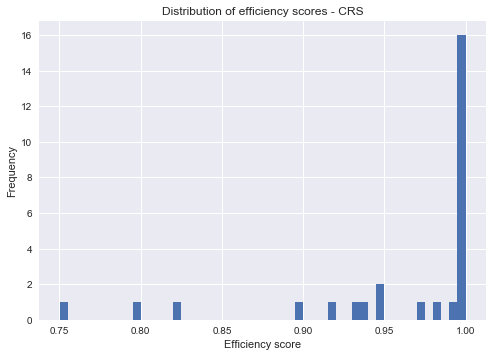

In [446]:
results['Efficiency'].hist(bins=50)
plt.ylabel('Frequency')
plt.xlabel('Efficiency score')
plt.title('Distribution of efficiency scores - CRS')
plt.show()

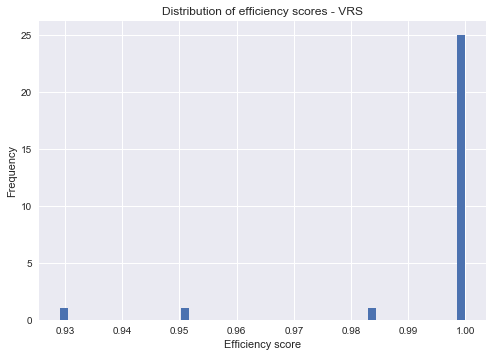

In [447]:
results_vrs['Efficiency'].hist(bins=50)
plt.ylabel('Frequency')
plt.xlabel('Efficiency score')
plt.title('Distribution of efficiency scores - VRS')
plt.show()

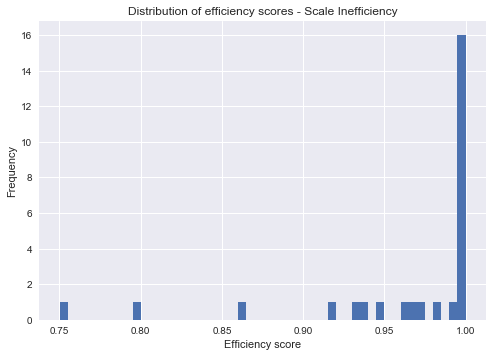

In [448]:
merged_results['Scale_Efficiency'].hist(bins=50)
plt.ylabel('Frequency')
plt.xlabel('Efficiency score')
plt.title('Distribution of efficiency scores - Scale Inefficiency')
plt.show()

### Inference

In [452]:
merged_results.head(5)

,CRS,VRS,Scale_Efficiency
States,,,
Andhra Pradesh,0.994605,1.0,0.994605
Arunachal Pradesh,0.981444,1.0,0.981444
Assam,1.000000,1.0,1.000000
Bihar,1.000000,1.0,1.000000
Chhattisgarh,1.000000,1.0,1.000000


##### Jharkhand

* 94.5535 % for CRSTE; Jharkhand could reduce their inputs by 5.45% whilst having the same output
* 98.40% for VRSTE; Jharkhand would be able to reduce input consumption by 1.60%. 
* 96.10% for SE; in adjusting their scale, Jharkhand could reduce their inputs by 3.90%

##### States that can be improved by altering scale

In [453]:
merged_results[merged_results.round(2).Scale_Efficiency!=1.00]

,CRS,VRS,Scale_Efficiency
States,,,
Andhra Pradesh,0.994605,1.000000,0.994605
Arunachal Pradesh,0.981444,1.000000,0.981444
Himachal Pradesh,0.933556,1.000000,0.933556
Jammu & Kashmir,0.821369,0.951749,0.863010
Jharkhand,0.945535,0.983967,0.960942
Madhya Pradesh,0.936853,1.000000,0.936853
Manipur,0.795605,1.000000,0.795605
Meghalaya,0.973251,1.000000,0.973251
Nagaland,0.945570,1.000000,0.945570
